In [ ]:
import pandas as pd 
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv( 'glass.csv', ) 
# df = df[:] 

df.head()

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


Counter({2.0: 76, 1.0: 69, 7.0: 29, 3.0: 17, 5.0: 13, 6.0: 9})
Class=1, n=69 (32.394%)
Class=2, n=76 (35.681%)
Class=3, n=17 (7.981%)
Class=5, n=13 (6.103%)
Class=6, n=9 (4.225%)
Class=7, n=29 (13.615%)


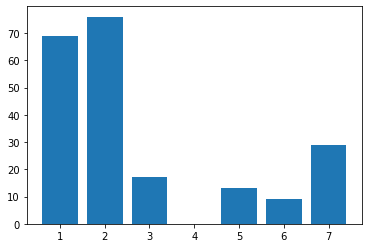

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]

Counter({0: 69, 5: 29, 2: 17})
Class=0, n=69 (32.394%)
Class=2, n=17 (7.981%)
Class=5, n=29 (13.615%)


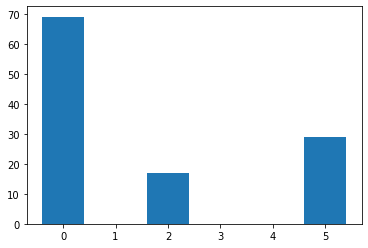

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
Original dataset shape Counter({0: 69, 5: 29, 2: 17})


,0,1,2,3,4,5,6,7,8
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...
24,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
25,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
26,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
27,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00


In [ ]:
from matplotlib import pyplot 
X = df.values[:,0:-1] 
y = df.values[:, -1] 
counter = Counter(y)
print(counter)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

y = LabelEncoder().fit_transform(y)

print(y)


x0 = pd.DataFrame(X[y==0])
x3=  pd.DataFrame(X[y==2])
x6=  pd.DataFrame(X[y==5])
X2 =  pd.concat( [x0, x3,x6]  )
print()

y0 = pd.DataFrame(y[y==0])
y3 = pd.DataFrame(y[y==2])
y6 = pd.DataFrame(y[y==5])


y2 =  pd.concat([y0,y3,y6] )
counter = Counter(y2[0])
print(counter)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

y = LabelEncoder().fit_transform(y)

print(y)
print('Original dataset shape %s' % Counter(y2[0]))
X2

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X2, y2[0] )
print('Original dataset shape %s' % Counter(y_res))


Original dataset shape Counter({0: 69, 2: 69, 5: 69})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(  
X_res, y_res, test_size = 0.5,) 


,0,1,2,3,4,5,6,7,8
105,1.516170,14.950000,0.000000,2.270000,73.300000,0.000000,8.710000,0.670000,0.000000
98,1.517270,14.700000,0.000000,2.340000,73.280000,0.000000,8.950000,0.660000,0.000000
153,1.516100,13.388597,3.445360,1.261871,72.683022,0.579532,8.323489,0.000000,0.000000
47,1.522230,13.210000,3.770000,0.790000,71.990000,0.130000,10.020000,0.000000,0.000000
198,1.515560,14.148455,0.000000,2.695502,73.399865,0.074363,9.065772,0.580406,0.055637
...,...,...,...,...,...,...,...,...,...
134,1.516743,13.445757,3.430421,1.182056,72.695968,0.448486,8.693531,0.000000,0.000000
31,1.517750,12.850000,3.480000,1.230000,72.970000,0.610000,8.560000,0.090000,0.220000
39,1.517930,12.790000,3.500000,1.120000,73.030000,0.640000,8.770000,0.000000,0.000000
75,1.517790,13.640000,3.650000,0.650000,73.000000,0.060000,8.930000,0.000000,0.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import random
from sklearn.metrics import accuracy_score
X_train.sample(frac=3, replace=True, random_state=100)
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (accuracy_score(y_test,y_pred))
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

0.2692307692307692
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           2       0.27      1.00      0.42        28
           5       0.00      0.00      0.00        41

    accuracy                           0.27       104
   macro avg       0.09      0.33      0.14       104
weighted avg       0.07      0.27      0.11       104



D:\Phan mem\pyp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Phan mem\pyp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Phan mem\pyp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82        37
           2       0.90      0.74      0.81        35
           5       0.97      0.97      0.97        32

    accuracy                           0.87       104
   macro avg       0.88      0.87      0.87       104
weighted avg       0.87      0.87      0.87       104



In [ ]:
print('Original dataset shape %s' % Counter(y2[0]))

Original dataset shape Counter({0: 69, 5: 29, 2: 17})
